In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("./Datasets/heart.csv")
df.head


<bound method NDFrame.head of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  outp

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [38]:
df[df.duplicated()]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [39]:
df.drop_duplicates(keep='first',inplace=True)

sex
1    206
0     96
Name: count, dtype: int64


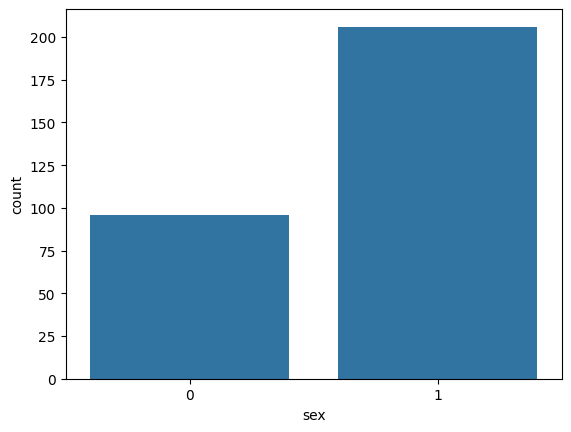

In [40]:
x = (df.sex.value_counts())
print(x)
p = sns.countplot(data=df , x = "sex")
plt.show()

cp
0    143
2     86
1     50
3     23
Name: count, dtype: int64


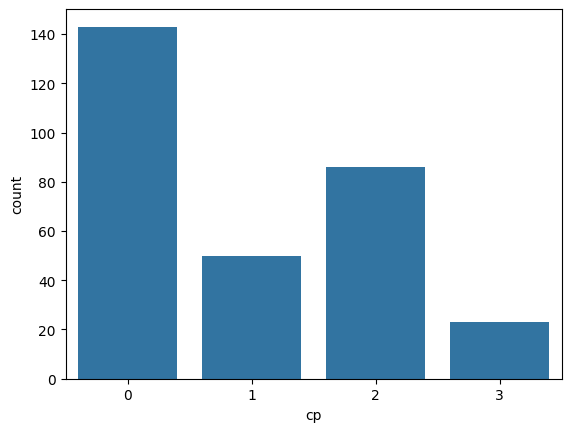

In [41]:
x = (df.cp.value_counts())
print(x)
p = sns.countplot(data=df , x = "cp")
plt.show()

<Figure size 1000x1000 with 0 Axes>

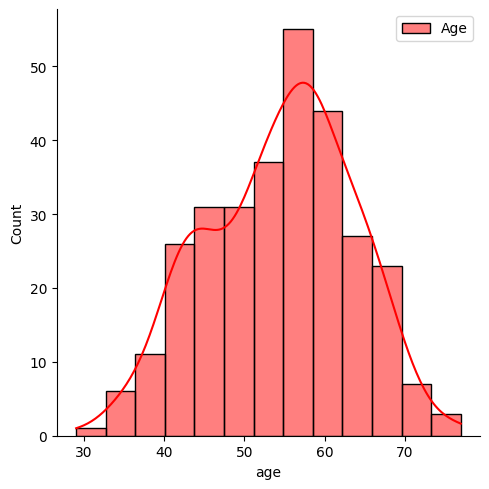

In [42]:
plt.figure(figsize=(10,10))
sns.displot(df.age,color="red",kde  = True , label="Age")
plt.legend()

<Figure size 1000x1000 with 0 Axes>

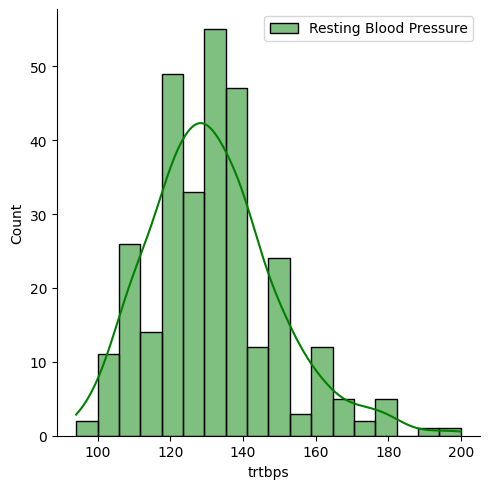

In [43]:
plt.figure(figsize=(10,10))
sns.displot(df.trtbps,color="green",kde  = True , label="Resting Blood Pressure")
plt.legend()

Text(0.5, 1.0, 'Attack Vs Age')

<Figure size 1000x1000 with 0 Axes>

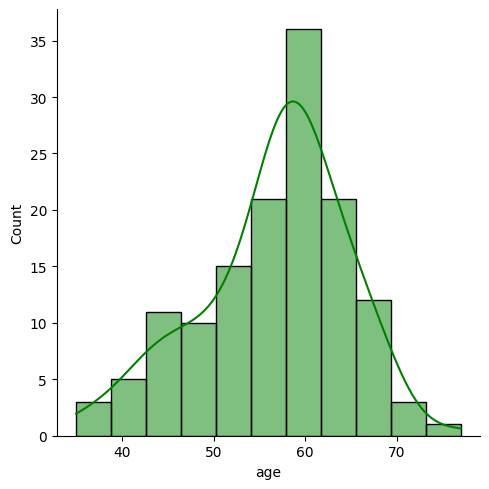

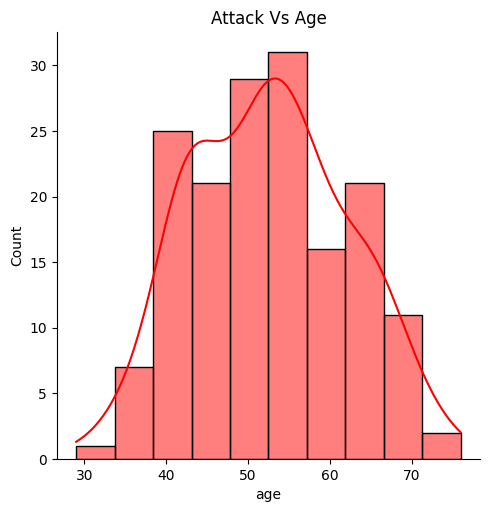

In [44]:
plt.figure(figsize=(10,10))
sns.displot(df[df["output"]==0]["age"], color="green", kde = True)
sns.displot(df[df["output"]==1]["age"], color="red", kde = True)
plt.title("Attack Vs Age")

Text(0.5, 1.0, 'Attack Vs Chol')

<Figure size 1000x1000 with 0 Axes>

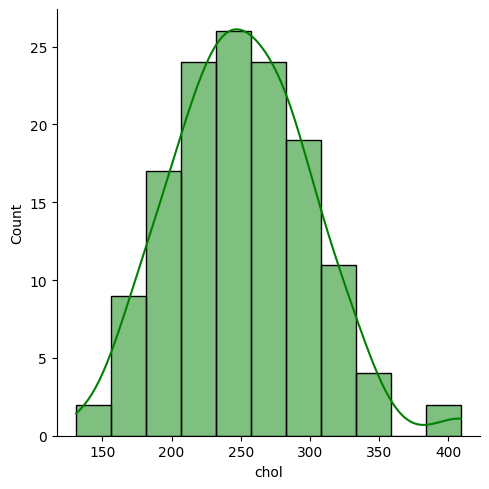

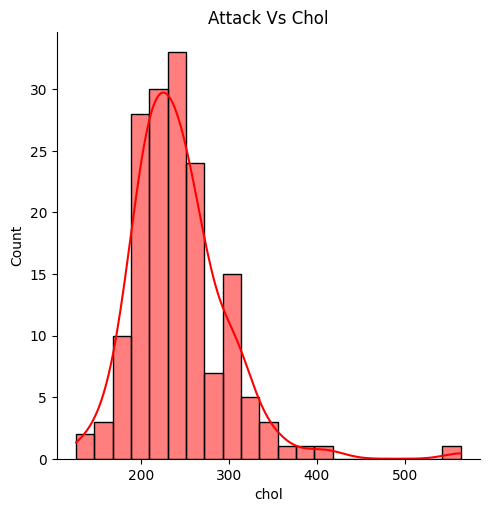

In [45]:
plt.figure(figsize=(10,10))
sns.displot(df[df["output"]==0]["chol"], color="green", kde = True)
sns.displot(df[df["output"]==1]["chol"], color="red", kde = True)
plt.title("Attack Vs Chol")

In [46]:
y = df.iloc[:,1].values
x = df.iloc[:,1:-1].values

In [47]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 42)

In [48]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [49]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train,y_train)


GaussianNB()

In [50]:
y_pred = model.predict(x_test)
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

1.0